<a href="https://colab.research.google.com/github/Habibu-Ahmad/Modelling_Ribosome_Motion/blob/main/Ballistic/k_some_density_profiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

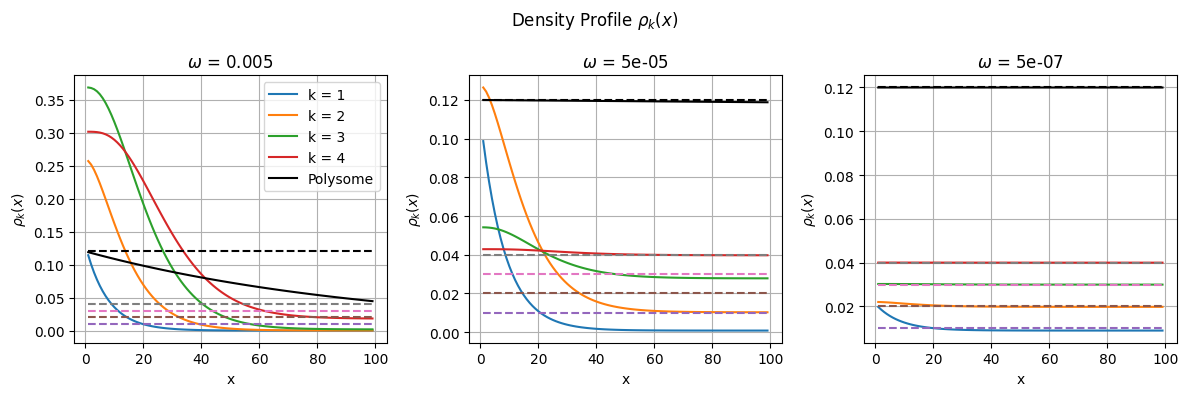

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammainc, factorial
from scipy.integrate import quad

# Function to calculate P_k
def calculate_Pk(alpha, omega, k, t_L):
    term1 = (omega / (alpha + omega)) * ((alpha / (alpha + omega)) ** k)
    term2 = gammainc(k + 1, (alpha + omega) * t_L) / factorial(k)
    term3 = np.exp(- (alpha + omega) * t_L)
    term4 = (((alpha * t_L) ** k) / factorial(k))
    P_k = term1 * term2 + term3 * term4
    return P_k

# Function to calculate p(x)
def calculate_p_x(L, t_L):
    return L / t_L

# Function to calculate t_x
def calculate_t_x(L, t_L, x_values):
    t_x_values = []
    for x in x_values:
        integrand = lambda y: 1 / (L / t_L)
        integral, _ = quad(integrand, 0, x)
        t_x_values.append(integral)
    return t_x_values

# Function to calculate rho_k(x)
def calculate_rho_k(alpha, omega, t_L, t_x_values, k_values, p_x):
    rho_k_values = []
    for k in k_values:
        rho_k = []
        P_k = calculate_Pk(alpha, omega, k, t_L)
        for t_x in t_x_values:
            term1 = ((alpha ** k) * (t_L ** (k - 1)) * np.exp(-(omega + alpha) * t_L)) / (p_x * P_k * factorial(k - 1))
            term2 = (omega / (p_x * P_k)) * ((alpha / (alpha + omega)) ** k) * ((gammainc(k, (omega + alpha) * t_L) - gammainc(k, (omega + alpha) * t_x)) / factorial(k - 1))
            rho_k.append(term1 + term2)
        rho_k_values.append(rho_k)
    return rho_k_values

# Parameters
L = 100
alpha = 0.06
t_L = 200
omega_values = [0.005, 0.00005, 0.0000005]
k_values = [1, 2, 3, 4]

# Generate x values
x_values = np.arange(1, L)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Loop over omega values
for i, omega in enumerate(omega_values):
    # Calculate t_x values
    t_x_values = calculate_t_x(L, t_L, x_values)
    # Calculate p_x
    p_x = calculate_p_x(L, t_L)
    # Plot for omega != 0
    for j, k in enumerate(k_values):
        rho_k_values = calculate_rho_k(alpha, omega, t_L, t_x_values, [k], p_x)
        axs[i].plot(x_values, rho_k_values[0], label=f'k = {k}', linestyle='-', alpha = 1)
    # Plot for omega = 0
    for j, k in enumerate(k_values):
        rho_k_values = calculate_rho_k(alpha, 0, t_L, t_x_values, [k], p_x)
        axs[i].plot(x_values, rho_k_values[0],  linestyle='--', alpha = 1)
    # Plotting the comparison function for omega != 0
    rho_k_comparison = (alpha / p_x) * np.exp(-omega * np.array(t_x_values))
    axs[i].plot(x_values, rho_k_comparison, label= 'Polysome', linestyle='-', color='black', alpha = 1)
    # Plotting the comparison function for omega = 0
    rho_k_comparison_omega0 = (alpha / p_x) * np.exp(0)
    axs[i].plot(x_values, [rho_k_comparison_omega0] * len(x_values), linestyle='--', color='black', alpha = 1)
    axs[i].set_xlabel('x')
    axs[i].set_ylabel(r'$\rho_k(x)$')
    axs[i].set_title(rf'$\omega$ = {omega}')
    axs[i].grid(True)
    if i == 0: # Add legend only to the first subplot
        axs[i].legend()


plt.suptitle(r'Density Profile $\rho_k(x)$ ')
plt.tight_layout()
plt.show()